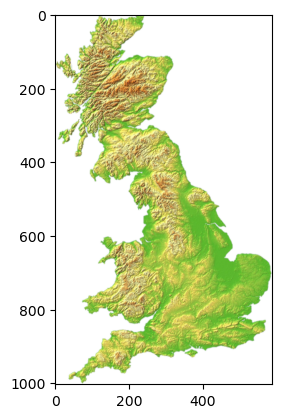

In [6]:
# load the base map from file
import matplotlib.pyplot as plt
import os

MY_PATH = r'C:\Users\bscho\Desktop\Schulzeug Kinder\Packi Land V0'
os.chdir(MY_PATH)

img = plt.imread('GBmapsimple1.bmp')
imgplot = plt.imshow(img)
plt.show()

In [7]:
img[773][200:230]  # get a feel for the data

array([[177, 173,  88],
       [168, 164,  74],
       [195, 191, 106],
       [170, 165,  86],
       [165, 159,  77],
       [168, 161,  79],
       [140, 132,  51],
       [160, 151,  68],
       [155, 146,  62],
       [188, 178,  92],
       [225, 217, 130],
       [179, 170,  78],
       [181, 169,  74],
       [164, 152,  48],
       [201, 189,  82],
       [214, 203,  97],
       [174, 162,  64],
       [226, 216, 127],
       [248, 239, 158],
       [171, 160,  77],
       [181, 169,  81],
       [231, 212, 116],
       [212, 194,  88],
       [244, 235, 120],
       [252, 247, 133],
       [252, 247, 148],
       [251, 246, 166],
       [219, 213, 145],
       [188, 180, 117],
       [224, 207, 133]], dtype=uint8)

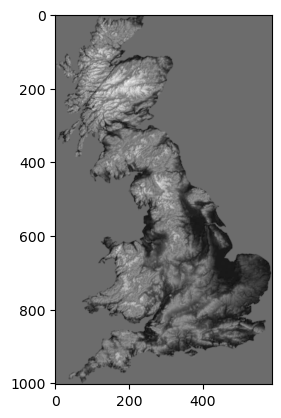

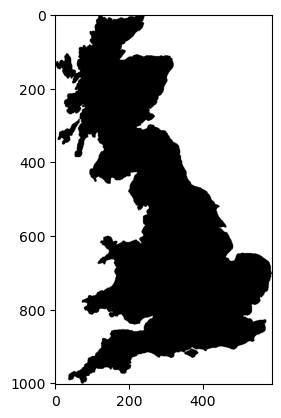

In [8]:
# transform to simple height from RGB
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    #return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return np.dot(rgb[...,:3], [0.5, -0.6, 0.0])  # brown is higher up, green is lower

def rgb2mask(rgb):
    '''create a mask for the land to prevent movement into the sea'''
    filter_arr = []
    # go through each element in arr
    for row in rgb:
        filter_row = []
        for element in row:
            if element[0] == 255 and element[1] == 255 and element[2] == 255:
                filter_row.append(1)
            else:
                filter_row.append(0)
        filter_arr.append(filter_row)
    return filter_arr

#img = mpimg.imread('image.png')     
gray = rgb2gray(img)
gray *= (1.0/(gray.max() - gray.min()))
gray -= gray.min()
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

mask = rgb2mask(img)
plt.imshow(mask, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [5]:
print(np.max(gray), np.min(gray))  # look at the data again
print('x, y:', len(gray[0]), len(gray))

0.9999999999999999 0.0
x, y: 587 1003


In [6]:
mask[800][400], mask[950][400]  # and again...

(0, 1)

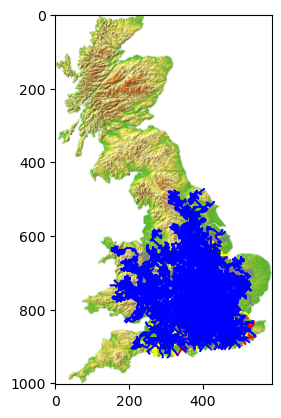

In [17]:
import random

def onestep(x, y, map, mask, factor=10):
    '''take one step on the map, considering the terrain'''
    nx, ny = x, y
    #if nx<0 or ny<0 or nx>len(map)-1 or ny>len(map[0])-1:
        #return -1, -1
    if mask[nx][ny] == 1:
        return -1, -1
    ctr = 0
    while mask[nx][ny] == 0 and ctr < 10:
        step = random.choice([(0,1), (1,1), (1,0), (1,-1), (0,-1), (-1,-1), (-1,0), (-1,1)])
        nx = max(min(len(map)-1, x + int(step[0] * factor * (1-map[nx][ny]))), 0)  # very simple terrain factor: the higher, the harder
        ny = max(min(len(map[0])-1, y + int(step[1] * factor * (1-map[nx][ny]))), 0)
        ctr += 1
    return nx, ny

# onestep(800, 400, gray, mask)

def walkpath(xstart, ystart, map, mask, nsteps=100):
    '''walk an entire path on the terrain'''
    path = []
    x, y = xstart, ystart
    n = 0
    while n < nsteps and x > 0 and y > 0:
        x, y = onestep(x, y, gray, mask)
        if x>0 and y>0:
            path.append((x, y))
        n += 1
    return path

#cpath = walkpath(800, 400, gray, mask)
#plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

plt.imshow(img)

startpoint = (850, 500)
nseedpaths = 8
ngenerations = 5
nnextgenpaths = 3
endpoints = []
# start with a few seed paths
for i in range(nseedpaths):
    cpath = walkpath(startpoint[0], startpoint[1], gray, mask)
    if len(cpath) > 0:
        endpoints.append(cpath[-1])
    plt.plot([x[1] for x in cpath], [x[0] for x in cpath], 'red')

# for each seed path, create generations of branches
colors = ['blue', 'red', 'yellow', 'grey']
for gencounts in range(ngenerations):
    ep2 = []
    for p in endpoints:
        for i in range(nnextgenpaths):
            cpath = walkpath(p[0], p[1], gray, mask)
            if len(cpath) > 0:
                ep2.append(cpath[-1])
            plt.plot([x[1] for x in cpath], [x[0] for x in cpath], colors[gencounts % len(colors)])
    endpoints = [p for p in ep2]
    
plt.show()

In [26]:
len(endpoints), endpoints[:2]

(15, [(782, 426), (813, 379)])

In [36]:
# determine basic statistics of expansion
import math

def dist(p0, p1):
    return math.sqrt((p0[0]-p1[0])**2 + (p0[1]-p1[1])**2)

def averagedist(startpoint, endpoints):
    return sum([dist(startpoint, p) for p in endpoints]) / len(endpoints)

mean = averagedist(startpoint, endpoints)

stdev = math.sqrt(sum([(dist(item, startpoint) - mean)**2 for item in endpoints]) / (len(endpoints) - 1))

print(f"mean: {mean:.2f}, stdev: {stdev:.2f}")

mean: 128.66, stdev: 48.49


In [46]:
8357.354+(837.3-583.7)-8750.3

-139.34599999999955

## Tokenizer GPT-4 and gpt-2 model

In [1]:
from transformers import GPT2TokenizerFast

tokenizer = GPT2TokenizerFast.from_pretrained('Xenova/gpt-4')
assert tokenizer.encode('hello world') == [15339, 1917]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT4Tokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [2]:
tokenizer.encode('hello world')

[15339, 1917]

In [3]:
tokenizer.decode([15339, 1917])

'hello world'

In [5]:
tokenizer.vocab_size

100261

In [17]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import os

# hyperparameters
batch_size = 32  # how many independent sequences will we process in parallel?
block_size = 64  # what is the maximum context length for predictions?
max_iters = 1200
eval_interval = 200
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 128
n_head = 4
n_layer = 4
dropout = 0.1

'''batch_size = 64  # how many independent sequences will we process in parallel?
block_size = 256  # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 384
n_head = 6
n_layer = 6
dropout = 0.2'''
# ------------

#torch.manual_seed(1337)

MY_PATH = r'D:\DL\lrgtxt0'
os.chdir(MY_PATH)
# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
#with open('input_sp0.txt', 'r', encoding='utf-8') as f:
#with open('taylorswift.txt', 'r', encoding='utf-8') as f:
with open('input_sp1.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
#chars = sorted(list(set(text)))
#vocab_size = len(chars)
vocab_size = tokenizer.vocab_size
# create a mapping from characters to integers
#stoi = { ch:i for i,ch in enumerate(chars) }
#itos = { i:ch for i,ch in enumerate(chars) }
#encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
#decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string
encode = lambda s: tokenizer.encode(s)
decode = lambda l: tokenizer.decode(l)

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):  # the heads handle the attention - the communication between the nodes (tokens)
    """ one head of self-attention """

    def __init__(self, head_size):  # takes headsize
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)  # k,q,v like above
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)  # values are affine projections of the original data, the "private data" (key k is "public")
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))  # tril is not a parameter of the model, a buffer in pytorch lingo
        # (so it does not get picked up by autograd)

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x)  # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5  # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))  # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x)  # (B,T,C)
        out = wei @ v  # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])  # pytorch makes this easy for us, passing just a list of heads
        self.proj = nn.Linear(n_embd, n_embd)  # project back into the original pathway
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)  # just concatinate the results, concat over channel dimension (dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):  # this handles the per-token (node) computation
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),  # the inner ff layer has 4 times the embedding dimension (to grow the computation on the residual pathway)
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),  # this is the projection layer going back into the original pathway (for the skip-connection) and going down from 4x
            nn.Dropout(dropout),  # added right before the residual pathway comes back (dropout trains subnetworks by randomly shutting off neurons)
        )

    def forward(self, x):
        return self.net(x)  # this is at a per token level: they think on all the attention data they got individually

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head  # watch out that it works out channelwise (e.g. 32 embedding, 4 heads, 8 headsize)
        self.sa = MultiHeadAttention(n_head, head_size)  # the heads running in parallel - the communication
        self.ffwd = FeedFoward(n_embd)  # simple feedforward: at token level, all tokens do this independently: gathered all info from attention, think on it
        # the ff does the computations
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):  # with skip connection, forking off direct gradient pass-through and block adjustments
        x = x + self.sa(self.ln1(x))  # the x + is the skip connection: it lets the gradient pass through (particularly initially), then the blocks adjust
        x = x + self.ffwd(self.ln2(x))  # note that the layer norms are applied before it goes into self-attention or ff, per token
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        # now the network starts to get really deep: suffers from computation problems, two ways to address this: (see Add & Norm in the figure)
        # 1. skip (residual) connections, see https://github.com/KaimingHe/deep-residual-networks (lets gradients pass through and lets blocks adjust them gradually)
        # 2. layer norms = Norm: similar to batch normalization: ensure each neuron has unit Gaussian distribution accross batch dimension
        self.ln_f = nn.LayerNorm(n_embd)  # final layer norm (now it is more common to norm before the computations unlike in the trafo paper - called prenorm)
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx)  # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device))  # (T,C)
        x = tok_emb + pos_emb  # (B,T,C)
        x = self.blocks(x)  # (B,T,C)
        x = self.ln_f(x)  # (B,T,C)
        logits = self.lm_head(x)  # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens (idx also has the PE so we need to crop) (not doing this causes a CUDA error due to index out of bounds)
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
#context = torch.zeros((1, 1), dtype=torch.long, device=device)
#print(decode(m.generate(context, max_new_tokens=3000)[0].tolist()))

26.567077 M parameters
step 0: train loss 11.6685, val loss 11.6685
step 200: train loss 5.9251, val loss 6.0465
step 400: train loss 5.0968, val loss 5.2146
step 600: train loss 4.7448, val loss 4.9017
step 800: train loss 4.4980, val loss 4.7094
step 1000: train loss 4.3301, val loss 4.5933
step 1199: train loss 4.1681, val loss 4.4347


In [18]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=3000)[0].tolist()))

! farewell, get your sheep; and
The pretty women here blood his life, nail will
His counsell forthwith blackator in see this bosom-- wife again;
This night your findings:
Pale answer our cause hath ill will.

ALO:
Last tragic sacred sex.

Shepherd:
I bail some call'd she did, my heart, my lord! solely lady mother's minds.
What's goodly to-night!
Your tongue?

Volsce:
It may ever yet I power where I dare doubt Friarina.

JULIET:
Hark, Lov I'll try my unsince her and now awhile?

FLORIZEL:
Such.

ISABELLA:
What will not say you this cock?

Second Citizen:
O friends, beseech you?

VOLUMNIA:
What, wisely he is beating! with him with G,
As you, forgive'd his money
I firmly.' Fly upon the people, to be: subjected of your name, I
bness and tied to march 'tis very
Are fellow may know ever ne'er-run you over Lartius, I end.

First Lord:
I am not the,
And sent you, sir. O, my uncleanness.

LORD ROSS OF YORK:
I did well: till I lay my repent mark the Tower
you,--Where things shall smell to bear '

### Demand estimate

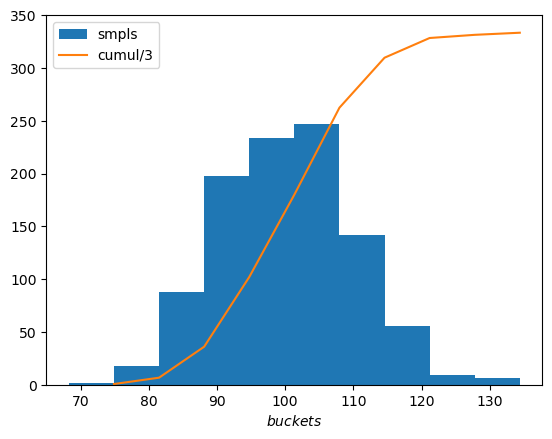

[2, 18, 88, 198, 234, 247, 142, 56, 9, 5]

In [85]:
import numpy as np
import matplotlib.pyplot as plt

mu = 100
sd = 10
number_of_samples=1000

samples = np.random.normal(mu, sd, size=number_of_samples)

hx, hy, _ = plt.hist(samples, label='smpls')
#plt.plot(hy[1:], np.cumsum(hx) * (hy[1] - hy[0]))
plt.plot(hy[1:], np.cumsum(hx) / 3, label='cumul/3')
plt.legend()
plt.xlabel('$buckets$')
plt.show()

#print(np.sort(samples)[:5], cumulativesamples[:5])

def histogram(samples, nbuckets=10):
    dy = (np.max(samples) - np.min(samples)) / nbuckets
    sortedsamples = np.sort(samples)
    cy = sortedsamples[0] + dy
    k = 0
    hist = [0 for i in range(nbuckets)]
    for i in range(nbuckets):
        while sortedsamples[k] < cy:
            hist[i] += 1
            k += 1
        cy += dy
    return hist

histogram(samples)

In [100]:
compose = lambda f, g: lambda x: f( g(x) )

def g(x):
    return 2*x

def f(x):
    return 3*x

myf = lambda x: x*x
print(myf(2))

print(compose(f, g)(2))

4
12


### question answering on invoices

In [101]:
# https://huggingface.co/impira/layoutlm-document-qa

In [14]:
from transformers import pipeline
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'D:\Tesseract-OCR\tesseract.exe'

# D:\Tesseract-OCR

nlp = pipeline(
    "document-question-answering",
    model="impira/layoutlm-document-qa",
)

'''nlp(
    "https://templates.invoicehome.com/invoice-template-us-neat-750px.png",
    "What is the invoice number?"
)
# {'score': 0.9943977, 'answer': 'us-001', 'start': 15, 'end': 15}

nlp(
    "https://miro.medium.com/max/787/1*iECQRIiOGTmEFLdWkVIH2g.jpeg",
    "What is the purchase amount?"
)
# {'score': 0.9912159, 'answer': '$1,000,000,000', 'start': 97, 'end': 97}

nlp(
    "https://www.accountingcoach.com/wp-content/uploads/2013/10/income-statement-example@2x.png",
    "What are the 2020 net sales?"
)
# {'score': 0.59147286, 'answer': '$ 3,750', 'start': 19, 'end': 20}
'''


print(nlp(
    r"C:\Users\bscho\Desktop\Screenshot 2024-03-04 110708.png",
    "What is the invoice number?"
))

print(nlp(
    r"C:\Users\bscho\Desktop\Screenshot 2024-03-04 110708.png",
    "What are the payment terms?"
))

print(nlp(
    r"C:\Users\bscho\Desktop\Screenshot 2024-03-04 110708.png",
    "What is the price?"
))


print(nlp(
    r"C:\Users\bscho\Desktop\Screenshot 2024-03-04 112207.png",
    "How many patients did not know their LDL-C goal?"
))

print(nlp(
    r"C:\Users\bscho\Desktop\Screenshot 2024-03-04 112207.png",
    "What are the conclusions?"
))


[{'score': 0.9999567270278931, 'answer': '2/24', 'start': 44, 'end': 44}]
[{'score': 0.9762842059135437, 'answer': '60 days', 'start': 100, 'end': 101}]
[{'score': 0.9731326103210449, 'answer': '210,00 EUR/hr', 'start': 90, 'end': 91}]
[{'score': 0.9998555183410645, 'answer': '69%', 'start': 254, 'end': 254}]
[{'score': 0.008152731694281101, 'answer': 'outpatients', 'start': 132, 'end': 132}]


In [8]:
# https://huggingface.co/docs/transformers/main/en/model_doc/donut

In [15]:
import re

from transformers import DonutProcessor, VisionEncoderDecoderModel
from datasets import load_dataset
import torch

processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
# load document image from the DocVQA dataset
dataset = load_dataset("hf-internal-testing/example-documents", split="test")
image = dataset[0]["image"]

# prepare decoder inputs
task_prompt = "<s_docvqa><s_question>{user_input}</s_question><s_answer>"
question = "When is the coffee break?"
prompt = task_prompt.replace("{user_input}", question)
decoder_input_ids = processor.tokenizer(prompt, add_special_tokens=False, return_tensors="pt").input_ids

pixel_values = processor(image, return_tensors="pt").pixel_values

outputs = model.generate(
    pixel_values.to(device),
    decoder_input_ids=decoder_input_ids.to(device),
    max_length=model.decoder.config.max_position_embeddings,
    pad_token_id=processor.tokenizer.pad_token_id,
    eos_token_id=processor.tokenizer.eos_token_id,
    use_cache=True,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
    return_dict_in_generate=True,
)

sequence = processor.batch_decode(outputs.sequences)[0]
sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token
print(processor.token2json(sequence))

preprocessor_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.01M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/478 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/803M [00:00<?, ?B/s]

D:\Anaconda\envs\tf-gpu\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Generating test split:   0%|          | 0/3 [00:00<?, ? examples/s]

{'question': 'When is the coffee break?', 'answer': '11-14 to 11:39 a.m.'}


tune Donut: https://www.philschmid.de/fine-tuning-donut

https://www.freecodecamp.org/news/how-to-fine-tune-the-donut-model/

Git: https://github.com/clovaai/donut

In [23]:
import re

from transformers import DonutProcessor, VisionEncoderDecoderModel
from datasets import load_dataset
import torch

from PIL import Image


processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
# load document image from the DocVQA dataset
dataset = load_dataset("hf-internal-testing/example-documents", split="test")
#image = dataset[0]["image"]
image = Image.open(r"C:\Users\bscho\Desktop\Screenshot 2024-03-04 151146.png").convert('RGB')  # apply to local file: formatis RGB

# prepare decoder inputs
task_prompt = "<s_docvqa><s_question>{user_input}</s_question><s_answer>"
question = "What is the price?"
prompt = task_prompt.replace("{user_input}", question)
decoder_input_ids = processor.tokenizer(prompt, add_special_tokens=False, return_tensors="pt").input_ids

pixel_values = processor(image, return_tensors="pt").pixel_values

outputs = model.generate(
    pixel_values.to(device),
    decoder_input_ids=decoder_input_ids.to(device),
    max_length=model.decoder.config.max_position_embeddings,
    pad_token_id=processor.tokenizer.pad_token_id,
    eos_token_id=processor.tokenizer.eos_token_id,
    use_cache=True,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
    return_dict_in_generate=True,
)

sequence = processor.batch_decode(outputs.sequences)[0]
sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token
print(processor.token2json(sequence))

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


{'question': 'What is the price?', 'answer': '210.00'}


### Test question answering with ROBERTA

In [3]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'How many did not know their LDL-C goal?',
    'context': '''BACKGROUND: Because of an increasing number and complexity of treatment options for lipid-lowering therapy in patients
with atherosclerotic cardiovascular disease, guidelines recommend greater active involvement of patients in shared decisionmaking. However, patients’ understanding and perceptions of the benefits, risks, and treatment objectives of lipid-lowering
therapy are unknown.
METHODS AND RESULTS: Structured questionnaires were conducted in 5006 US outpatients with atherosclerotic cardiovascular
disease and suboptimal low-density lipoprotein cholesterol (LDL-C) control (LDL-C ≥70 mg/dL) or on a PCSK9 (proprotein
convertase subtilisin/kexin type 9) inhibitor and in 113 physician providers as a part of the GOULD (Getting to an Improved
Understanding of Low-Density Lipoprotein Cholesterol and Dyslipidemia Management) Registry. Mean age of the patients
was 68±10 years, 60% were men, and 86% were White race. Across all patients, 63% believed heart disease was the leading cause of death in men and 46% the leading cause of death in women. Only 28% of patients thought the primary reason
they were taking lipid-lowering medication was to lower the risk of heart attack or stroke, 68% did not know their approximate
LDL-C level, and 69% did not know their LDL-C goal. Patients on PCSK9 inhibitors (versus LDL-C cohort), younger patients
(versus age ≥65 years), and men (versus women) were somewhat more knowledgeable about their disease and its management. Most physicians (66%) felt that a lack of understanding of the importance and efficacy of statins was the primary factor
contributing to nonadherence, as opposed to costs (9%) or side effects (1%). More education was the most commonly used
strategy to address patient-reported side effects.
CONCLUSIONS: A large proportion of patients with atherosclerotic cardiovascular disease remain unaware of their underlying
atherosclerotic cardiovascular disease risk, reasons for taking lipid-lowering medications, current LDL-C levels, or treatment
goals. These data highlight a large education gap which, if addressed, may improve shared decision-making and treatment
adherence.'''
}
res = nlp(QA_input)

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [4]:
res

{'score': 0.9831233024597168, 'start': 1247, 'end': 1250, 'answer': '69%'}

In [5]:
QA_input = {
    'question': 'How many did not know their LDL-C level?',
    'context': '''BACKGROUND: Because of an increasing number and complexity of treatment options for lipid-lowering therapy in patients
with atherosclerotic cardiovascular disease, guidelines recommend greater active involvement of patients in shared decisionmaking. However, patients’ understanding and perceptions of the benefits, risks, and treatment objectives of lipid-lowering
therapy are unknown.
METHODS AND RESULTS: Structured questionnaires were conducted in 5006 US outpatients with atherosclerotic cardiovascular
disease and suboptimal low-density lipoprotein cholesterol (LDL-C) control (LDL-C ≥70 mg/dL) or on a PCSK9 (proprotein
convertase subtilisin/kexin type 9) inhibitor and in 113 physician providers as a part of the GOULD (Getting to an Improved
Understanding of Low-Density Lipoprotein Cholesterol and Dyslipidemia Management) Registry. Mean age of the patients
was 68±10 years, 60% were men, and 86% were White race. Across all patients, 63% believed heart disease was the leading cause of death in men and 46% the leading cause of death in women.
Only 28% of patients thought the primary reason
they were taking lipid-lowering medication was to lower the risk of heart attack or stroke, 68% did not know their approximate
LDL-C level, and 69% did not know their LDL-C goal. Patients on PCSK9 inhibitors (versus LDL-C cohort), younger patients
(versus age ≥65 years), and men (versus women) were somewhat more knowledgeable about their disease and its management. Most physicians (66%) felt that a lack of understanding of the importance and efficacy of statins was the primary factor
contributing to nonadherence, as opposed to costs (9%) or side effects (1%). More education was the most commonly used
strategy to address patient-reported side effects.
CONCLUSIONS: A large proportion of patients with atherosclerotic cardiovascular disease remain unaware of their underlying
atherosclerotic cardiovascular disease risk, reasons for taking lipid-lowering medications, current LDL-C levels, or treatment
goals. These data highlight a large education gap which, if addressed, may improve shared decision-making and treatment
adherence.'''
}
print(nlp(QA_input))

{'score': 0.9517518877983093, 'start': 1195, 'end': 1198, 'answer': '68%'}


### tabular queries

In [12]:
#https://huggingface.co/docs/transformers/en/model_doc/tapas

from transformers import TapasTokenizer, TapasForQuestionAnswering
import pandas as pd

model_name = "google/tapas-base-finetuned-wtq"
model = TapasForQuestionAnswering.from_pretrained(model_name)
tokenizer = TapasTokenizer.from_pretrained(model_name)

data = {"Actors": ["Brad Pitt", "Leonardo Di Caprio", "George Clooney"], "Number of movies": ["87", "53", "69"]}
queries = [
    "What is the name of the first actor?",
    "How many movies has George Clooney played in?",
    "What is the total number of movies?",
]
table = pd.DataFrame.from_dict(data)
inputs = tokenizer(table=table, queries=queries, padding="max_length", return_tensors="pt")
outputs = model(**inputs)
predicted_answer_coordinates, predicted_aggregation_indices = tokenizer.convert_logits_to_predictions(
    inputs, outputs.logits.detach(), outputs.logits_aggregation.detach()
)

# let's print out the results:
id2aggregation = {0: "NONE", 1: "SUM", 2: "AVERAGE", 3: "COUNT"}
aggregation_predictions_string = [id2aggregation[x] for x in predicted_aggregation_indices]

answers = []
for coordinates in predicted_answer_coordinates:
    if len(coordinates) == 1:
        # only a single cell:
        answers.append(table.iat[coordinates[0]])
    else:
        # multiple cells
        cell_values = []
        for coordinate in coordinates:
            cell_values.append(table.iat[coordinate])
        answers.append(", ".join(cell_values))

display(table)
print("")
for query, answer, predicted_agg in zip(queries, answers, aggregation_predictions_string):
    print(query)
    if predicted_agg == "NONE":
        print("Predicted answer: " + answer)
    else:
        print("Predicted answer: " + predicted_agg + " > " + answer)

config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/490 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/262k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

,Actors,Number of movies
0,Brad Pitt,87
1,Leonardo Di Caprio,53
2,George Clooney,69



What is the name of the first actor?
Predicted answer: Brad Pitt
How many movies has George Clooney played in?
Predicted answer: COUNT > 69
What is the total number of movies?
Predicted answer: SUM > 87, 53, 69


In [14]:
from transformers import TapasTokenizer, TapasForQuestionAnswering
import pandas as pd

model_name = "google/tapas-base-finetuned-wtq"
model = TapasForQuestionAnswering.from_pretrained(model_name)
tokenizer = TapasTokenizer.from_pretrained(model_name)

data = {"Product": ["Amladol", "Finimil", "Samazal"], "Sales": ["120", "523", "245"]}
queries = [
    "What is the sales of Amladol?",
    "What is the third product?",
    "What is the total os sales?",
]
table = pd.DataFrame.from_dict(data)
inputs = tokenizer(table=table, queries=queries, padding="max_length", return_tensors="pt")
outputs = model(**inputs)
predicted_answer_coordinates, predicted_aggregation_indices = tokenizer.convert_logits_to_predictions(
    inputs, outputs.logits.detach(), outputs.logits_aggregation.detach()
)

# let's print out the results:
id2aggregation = {0: "NONE", 1: "SUM", 2: "AVERAGE", 3: "COUNT"}
aggregation_predictions_string = [id2aggregation[x] for x in predicted_aggregation_indices]

answers = []
for coordinates in predicted_answer_coordinates:
    if len(coordinates) == 1:
        # only a single cell:
        answers.append(table.iat[coordinates[0]])
    else:
        # multiple cells
        cell_values = []
        for coordinate in coordinates:
            cell_values.append(table.iat[coordinate])
        answers.append(", ".join(cell_values))

display(table)
print("")
for query, answer, predicted_agg in zip(queries, answers, aggregation_predictions_string):
    print(query)
    if predicted_agg == "NONE":
        print("Predicted answer: " + answer)
    else:
        print("Predicted answer: " + predicted_agg + " > " + answer)

D:\Anaconda\envs\tf-gpu\lib\site-packages\transformers\models\tapas\tokenization_tapas.py:2762: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = normalize_for_match(row[col_index].text)
D:\Anaconda\envs\tf-gpu\lib\site-packages\transformers\models\tapas\tokenization_tapas.py:1561: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell = row[col_index]


,Product,Sales
0,Amladol,120
1,Finimil,523
2,Samazal,245



What is the sales of Amladol?
Predicted answer: SUM > 120
What is the third product?
Predicted answer: Finimil
What is the total os sales?
Predicted answer: SUM > 120, 523, 245


In [46]:
# data from file
import pandas as pd

#data = {"Product": ["Amladol", "Finimil", "Samazal"], "Sales": ["120", "523", "245"]}
#table = pd.DataFrame.from_dict(data)

table = pd.read_csv("wars history V0 - number of wars.csv")

table = table.astype(str)  # tapas needs strings or byte-like
print(table.columns)
print(table[:3])

Index(['Entity', 'Code', 'Year', 'NrOngoingCivilWars', 'NrOngoingNonCivil'], dtype='object')
     Entity Code  Year NrOngoingCivilWars NrOngoingNonCivil
0  Americas  nan  1800                  0                 0
1  Americas  nan  1801                  0                 0
2  Americas  nan  1802                  0                 0


In [47]:
queries = [
    r"What is the NrOngoingCivilWars in Americas in 1899?",
    r"What is the NrOngoingCivilWars in Europe in 1899?",
]

inputs = tokenizer(table=table, queries=queries, padding="max_length", return_tensors="pt")
outputs = model(**inputs)
predicted_answer_coordinates, predicted_aggregation_indices = tokenizer.convert_logits_to_predictions(
    inputs, outputs.logits.detach(), outputs.logits_aggregation.detach()
)

# let's print out the results:
id2aggregation = {0: "NONE", 1: "SUM", 2: "AVERAGE", 3: "COUNT"}
aggregation_predictions_string = [id2aggregation[x] for x in predicted_aggregation_indices]

answers = []
for coordinates in predicted_answer_coordinates:
    if len(coordinates) == 1:
        # only a single cell:
        answers.append(table.iat[coordinates[0]])
    else:
        # multiple cells
        cell_values = []
        for coordinate in coordinates:
            cell_values.append(table.iat[coordinate])
        answers.append(", ".join(cell_values))

display(table)
print("")
for query, answer, predicted_agg in zip(queries, answers, aggregation_predictions_string):
    print(query)
    if predicted_agg == "NONE":
        print("Predicted answer: " + answer)
    else:
        print("Predicted answer: " + predicted_agg + " > " + answer)

D:\Anaconda\envs\tf-gpu\lib\site-packages\transformers\models\tapas\tokenization_tapas.py:2762: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = normalize_for_match(row[col_index].text)
D:\Anaconda\envs\tf-gpu\lib\site-packages\transformers\models\tapas\tokenization_tapas.py:1561: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell = row[col_index]
Token indices sequence length is longer than the specified maximum sequence length for this model (2155 > 512). Running this sequence through the model will result in indexing errors.


IndexError: index out of range in self

In [62]:
import math

def is_prime(n):
    if n == 2 or n == 3: return True
    if n < 2 or n%2 == 0: return False
    if n < 9: return True
    if n%3 == 0: return False
    r = int(n**0.5)
    f = 5
    while f <= r:
        if n % f == 0: return False
        if n % (f+2) == 0: return False
        f += 6
    return True

def divisors(n):
    return [x for x in range(1, n) if n % x == 0]

def is_perfect_number_e(n):
    p = int(math.sqrt(n))
    perfect_number = (2**p - 1) * 2**(p-1)
    return perfect_number == n, p

def is_perfect_number(n):
    divisors_sum = sum(divisors(n))
    return divisors_sum == n

def sigma(n):
    return len(divisors(n)) + 1

print(is_perfect_number(6), is_perfect_number_e(6))
print(is_perfect_number(28), is_perfect_number_e(28))
print(is_perfect_number(496), is_perfect_number_e(496))
sigma(30)

True (True, 2)
True (False, 5)
True (False, 22)


8

In [85]:
# subset sum
import itertools

def subsetsum(integerset, x):
    if sum(integerset) < x or min(integerset) > x:  # O(n)
        return False
    if x in integerset:
        return True
    for n in range(2, len(integerset)):
        for el in itertools.combinations(integerset, n):  # O(n!)
            if sum(el) == x:
                return True
    return False

def subsetsum1(integerset, x):  # does not yet capture all cases
    if sum(integerset) < x or min(integerset) > x:  # O(n)
        return False, []
    if x in integerset:
        return True, [x]
    integerset.sort(reverse=True)
    maxcomb = 2**len(integerset) - 1
    combinationstested = []  # holds all the combinations already tested
    while True:
        cand = []
        xrest = x
        for idx,el in enumerate(integerset):
            # todo: need to check for existing combinations -> so nothing is gained as here we have to test all (worst case)
            if xrest >= el:
                xrest -= el
                cand.append((idx, el))
            if xrest <= 0:
                break
        if xrest == 0:
            return True, cand
        combinationstested.append(cand)
        if len(combinationstested) == maxcomb:
            return False, cand
    return False, cand
    
print(subsetsum([1,2,3], 5), subsetsum1([1,2,3], 5))
print(subsetsum([1,2,3], 4), subsetsum1([1,2,3], 4))

True (True, [(0, 3), (1, 2)])
True (True, [(0, 3), (2, 1)])


In [63]:
# https://huggingface.co/timbrooks/instruct-pix2pix

In [2]:
import math

math.sqrt(2), 14143/10000

(1.4142135623730951, 1.4143)

### conformal prediction

In [2]:
import os
import wget
import zipfile
from os.path import exists

bean_data_file = "./DryBeanDataset/Dry_Bean_Dataset.xlsx"
base = "https://archive.ics.uci.edu/ml/machine-learning-databases/"
dataset_number = "00602"
if not exists(bean_data_file):
    filename = "DryBeanDataset.zip"
    url = base + dataset_number + "/" + filename
    wget.download(url)
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('./')
    os.remove(filename)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

bean_data_file = "./DryBeanDataset/Dry_Bean_Dataset.xlsx"
beans = pd.read_excel(bean_data_file)

le = LabelEncoder()
beans["Class"] = le.fit_transform(beans["Class"])
y = beans["Class"]
x = beans.drop("Class", axis=1)

x_train, x_rest1, y_train, y_rest1 = train_test_split(x, y, train_size=10000, random_state=2)
x_test, x_rest2, y_test, y_rest2 = train_test_split(x_rest1, y_rest1, train_size=1000, random_state=42)
x_calib, x_new, y_calib, y_new = train_test_split(x_rest2, y_rest2, train_size=1000, random_state=2)

model = GaussianNB().fit(x_train, y_train)

In [5]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
print(f"accuracy {(y_pred == y_test).mean()}")

cm = confusion_matrix(y_test, y_pred)
# rows are the true classes, columns the predicted classes
print(pd.DataFrame(cm, index=le.classes_, columns=le.classes_))

accuracy 0.758
          BARBUNYA  BOMBAY  CALI  DERMASON  HOROZ  SEKER  SIRA
BARBUNYA        46       0    47         0      6      0     4
BOMBAY           0      33     0         0      0      0     0
CALI            20       0    81         0      3      0     0
DERMASON         0       0     0       223      0     32     9
HOROZ            0       0     4         3    104      0    22
SEKER            2       0     0        26      1    127    22
SIRA             0       0     0        10     10     21   144


In [17]:
cm = confusion_matrix(y_calib, y_pred)
# rows are the true classes, columns the predicted classes
print(pd.DataFrame(cm, index=le.classes_, columns=le.classes_))

          BARBUNYA  BOMBAY  CALI  DERMASON  HOROZ  SEKER  SIRA
BARBUNYA         9       3    13        30     12     20    22
BOMBAY           1       0     4         4      6      5    12
CALI             5       2    13        31     21     23    19
DERMASON        20      11    32        64     19     49    48
HOROZ            9       1    21        49     15     24    31
SEKER            9       9    18        27     20     23    36
SIRA            15       7    31        57     31     36    33


In [25]:
predictions = model.predict_proba(x_calib)
high_prob_pred = np.amax(predictions, axis=1)

print(high_prob_pred[:5])

high_p_beans = np.where(high_prob_pred >= 0.95)

#print(high_p_beans[:3])

its_a_match = (model.predict(x_calib) == y_calib)

print(its_a_match)

coverage = np.mean(its_a_match.values[high_p_beans])

print(its_a_match.values[high_p_beans][:15])

print(round(coverage, 3))

[0.99434844 1.         0.99767271 0.99998111 0.84215091]
5359      True
10803     True
9449      True
6616      True
3057     False
         ...  
12895     True
2826     False
5301      True
5765     False
10185     True
Name: Class, Length: 1000, dtype: bool
[ True  True  True  True  True  True  True False  True  True  True  True
  True False  True]
0.898


In [27]:
n = len(x_calib)
predictions = model.predict_proba(x_calib)  # prbability predictions on calibration set

print(predictions[:3])

prob_true_class = predictions[np.arange(n), y_calib]  # probability for true classes
scores = 1 - prob_true_class  # uncertainity scores (non-conformity)

print(scores[:5])

[[5.65156373e-003 9.75397796e-021 9.94348436e-001 9.63094514e-130
  8.93336481e-021 2.48542516e-100 1.39585754e-084]
 [5.94404694e-028 1.59325981e-082 5.98248259e-044 1.00000000e+000
  4.39920515e-019 1.49688265e-010 1.04125612e-018]
 [1.78027756e-008 5.72177484e-055 6.78843616e-014 5.94808331e-013
  2.27774560e-003 4.95229795e-005 9.97672714e-001]]
[5.65156373e-03 1.49690038e-10 2.32728639e-03 1.88935534e-05
 8.42150912e-01]


In [13]:
alpha = 0.05
q_lvl = np.ceil((n+1) * (1-alpha)) / n
q_hat = np.quantile(scores, q_lvl, method='higher')

print(q_lvl, q_hat)

0.951 0.9985178757661748


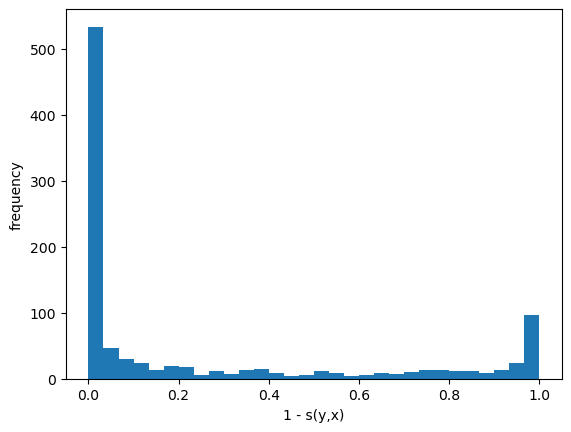

In [15]:
import matplotlib.pyplot as plt

predictions = model.predict_proba(x_calib)  # prbability predictions
prob_true_class = predictions[np.arange(len(y_calib)), y_calib]  # probability for true classes
plt.hist(1 - prob_true_class, bins=30, range=(0, 1))
plt.xlabel("1 - s(y,x)")
plt.ylabel("frequency")
plt.show()

In [16]:
prediction_sets = (1 - model.predict_proba(x_new) <= q_hat)
for i in range(3):
    print(le.classes_[prediction_sets[i]])

['BARBUNYA' 'CALI']
['DERMASON' 'SEKER']
['DERMASON']


In [ ]:
# https://mindfulmodeler.substack.com/p/week-1-getting-started-with-conformal

predictions = model.predict_proba(X_calib)
prob_true_class = predictions[np.arange(len(y_calib)),y_calib]
qhat = np.quantile(1 - prob_true_class, 0.95)


from mapie.classification import MapieClassifier

cp = MapieClassifier(estimator=model, cv="prefit",  method="score")
cp.fit(X_calib, y_calib)

y_pred, y_set = cp.predict(X_new, alpha=0.05)


mapie_reg = MapieRegressor(estimator=model, cv="prefit")
mapie_reg.fit(X_calib, y_calib)
y_pred, y_cis = mapie_reg.predict(X_new, alpha=1/3)


low = GradientBoostingRegressor(loss='quantile',alpha=1/6)
median = GradientBoostingRegressor(loss='quantile',alpha=0.5)
up = GradientBoostingRegressor(loss='quantile',alpha=5/6)


cqr = MapieQuantileRegressor([low, median, up], alpha=[1/6, 0.5, 5/6],    cv="prefit")
cqr.fit(X_calib, y_calib)
cqr.predict(X_new)


In [4]:
import math

math.sqrt(3 - math.sqrt(8))

0.4142135623730948

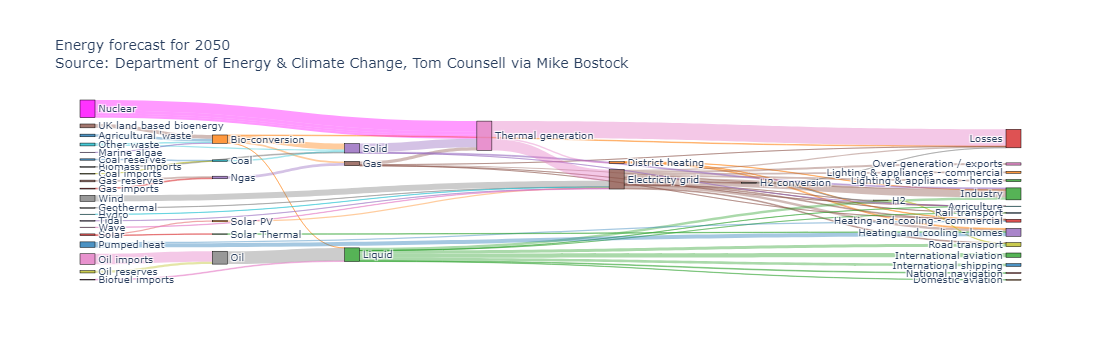

In [2]:
# https://python-graph-gallery.com/

import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)

In [18]:
4/28

0.14285714285714285

In [29]:
# https://stackoverflow.com/questions/55102473/how-do-we-fit-a-sigmoid-function-in-python
# https://mycurvefit.com/

from scipy.optimize import curve_fit
from scipy.stats import beta

def sigmoid (x, A, h, slope, C):
    return 1 / (1 + np.exp ((x - h) / slope)) *  A + C

xt = [0, 0, 0.5, 1, 1, 2, 3, 5] 
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, 1)
alpha, beta, loc, scale = beta.fit(xt)  
pdf_beta = beta.pdf(lnspc, alpha, beta,loc, scale)
# Fits the function sigmoid with the x and y data
#   Note, we are using the cumulative sum of your beta distribution!
p, _ = curve_fit(sigmoid, lnspc, pdf_beta.cumsum())

# Plots the data
plt.plot(lnspc, pdf_beta.cumsum(), label='original')
plt.plot(lnspc, sigmoid(lnspc, *p), label='sigmoid fit')
plt.legend()

# Show parameters for the fit
print(p)

AttributeError: 'numpy.float64' object has no attribute 'pdf'

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#df = pd.DataFrame({
#            'x': [ 1000, 3250, 5500, 10000, 32500, 55000, 77500, 100000, 200000 ],
#            'y': [ 1100, 500, 288, 200, 113, 67, 52, 44, 5 ]
#        })
#df.plot(x='x', y='y', kind='line', style='--ro', figsize=(10, 5))

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c

#target_func = func_powerlaw

#X = df['x']
#y = df['y']

#popt, pcov = curve_fit(target_func, X, y)



x = np.asarray([ 1000, 3250, 5500, 10000, 32500, 55000, 77500, 100000, 200000 ])
y = np.asarray([ 1100, 500, 288, 200, 113, 67, 52, 44, 5 ])

#sol1 = curve_fit(func_powerlaw, x, y, maxfev=2000 )
sol2 = curve_fit(func_powerlaw, x, y, p0 =np.asarray([0,10**5,0]))

print(sol2)

plt.figure(figsize=(10, 5))
plt.plot(x, sol2(x), '--')
plt.plot(x, y, 'ro')
plt.legend()
plt.show()

(array([-7.20677320e-01,  1.60095241e+05, -4.98243838e-02]), array([[ 1.74379267e-03, -1.90049738e+03, -5.62847540e-01],
       [-1.90049738e+03,  2.08480102e+09,  5.91200236e+05],
       [-5.62847540e-01,  5.91200236e+05,  2.75545993e+02]]))


TypeError: 'tuple' object is not callable

<Figure size 1000x500 with 0 Axes>

[3.05931973 1.45754553]


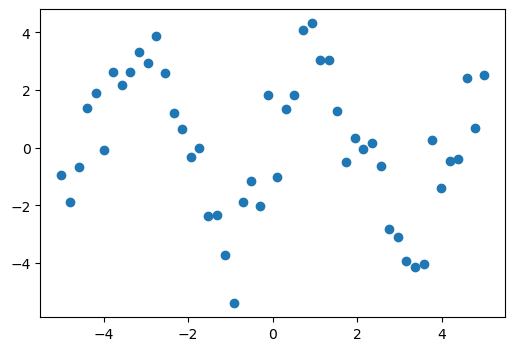

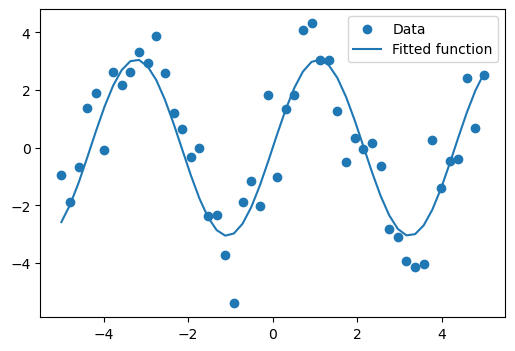

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)


plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

[  0.58446427 269.69688081]


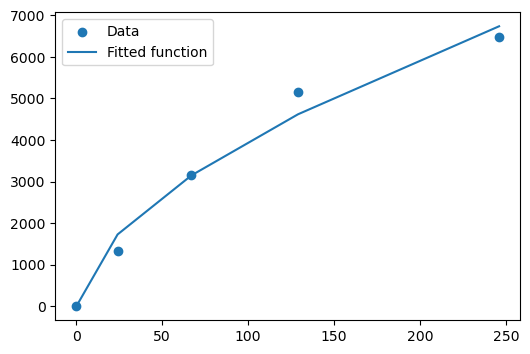

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


x_data = np.array([0, 24, 67, 129, 246])
y_data = np.array([0, 1323, 3152, 5160, 6465])

def func_powerlaw(x, m, c):
    return x**m * c

params, params_covariance = optimize.curve_fit(func_powerlaw, x_data, y_data, p0 =np.asarray([1, 10**5]))

print(params)

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, func_powerlaw(x_data, params[0], params[1]), label='Fitted function')

plt.legend(loc='best')

plt.show()

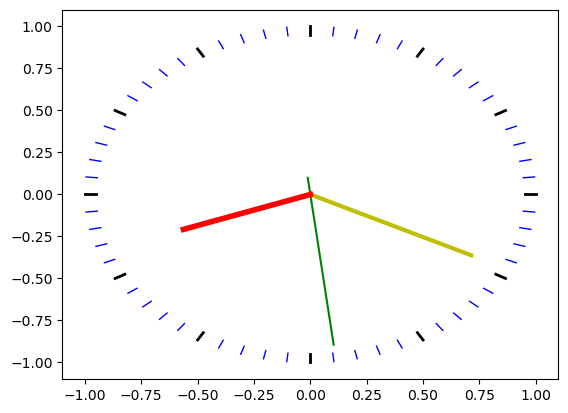

In [3]:
import matplotlib.pyplot as plt
from time import sleep, time, localtime
# Constant are CAPitalized in python by convention
from cmath import  pi as PI, e as E


# correcting python notations j => I  
I = complex("j")

# maplotlib does not plot lines using the classical
# (x0,y0), (x1,y1) convention
# but prefers (x0,x1) (y0,y1)
to_xx_yy = lambda c1,c2 : [(c1.real, c2.real), (c1.imag, c2.imag)] 

# black magic
plt.ion()
plt.show()

# fixing the weired / behaviour in python 2 by forcing cast in float
# 2 * PI = one full turn in radians (SI) second makes a
# 60th of a turn per seconds
# an arc is a fraction of turn
rad_per_sec = 2.0 * PI / 60.0
# 60 times slower
rad_per_min = rad_per_sec / 60
# wall clock are not on 24 based because human tends to
# know if noon is passed
rad_per_hour = rad_per_min / 12

# I == rectangular coordonate (0,1) in complex notation
origin_vector_hand = I

size_of_sec_hand = .9
size_of_min_hand = .8
size_of_hour_hand = .6

# Euler's Formula is used to compute the rotation
# using units in names to check unit consistency
# rotation is clockwise (hence the minus)
# Euler formular requires a measure of angle (rad)
rot_sec = lambda sec : E ** (-I * sec * rad_per_sec )
rot_min = lambda min : E ** (-I *  min * rad_per_min )
rot_hour = lambda hour : E ** (-I * hour * rad_per_hour )

# drawing the ticks and making them different every
# division of 5
for n in range(60):
    plt.plot(
        *to_xx_yy(
            origin_vector_hand * rot_sec(n),
            .95 * I * rot_sec(n)
        )+[n% 5 and 'b-' or 'k-'],
        lw= n% 5 and 1 or 2
    )
    plt.draw()
# computing the offset between the EPOCH and the local political convention of time
diff_offset_in_sec = (time() % (24*3600)) - localtime()[3]*3600 -localtime()[4] * 60.0 - localtime()[5]   
n=0


n+=1
t = time()
# sexagesimal base conversion
s = t % 60
m = m_in_sec = t % (60 * 60)
h = h_in_sec = (t- diff_offset_in_sec) % (24*60*60)
# applying a rotation AND and homothetia for the vectors expressent as (complex1, ccomplex2)
# using the * operator of complex algebrae to do the job
l = plt.plot( *to_xx_yy(
        -.1 * origin_vector_hand * rot_sec(s),
        size_of_sec_hand * origin_vector_hand * rot_sec(s)) + ['g']  )
j = plt.plot( *to_xx_yy(0, size_of_min_hand * origin_vector_hand * rot_min( m )) + ['y-'] , lw= 3)
k = plt.plot( *to_xx_yy(0, size_of_hour_hand * origin_vector_hand * rot_hour(h)) +[ 'r-'] , lw= 4)


In [5]:
sum([2**n for n in range(25)]) - (2**25-1)

0

In [1]:
import numpy as np
from scipy import stats


rng = np.random.default_rng()

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=3, scale=10, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs2)

TtestResult(statistic=2.015159705017228, pvalue=0.0441556495893946, df=998.0)

In [10]:
# powerful numbers

def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

def divisors(n):
    res = [1, n]
    for i in range(2,int(n/2)):
        if n % i == 0:
            res.append(i)
    return res

def powerfulnumber(n):
    # A positive integer n is a powerful number if, for every prime factor p of n, p**2 is also a divisor.
    pf = prime_factors(n)
    if sum([n % (p*p) for p in pf]) == 0:
        return True
    return False

powerfulnumber(72)

True